In [1]:
try:
    import plate_model_manager
except ImportError:
    print("The plate_model_manager is not installed, installing it now!")
    import subprocess
    import sys

    subprocess.call([sys.executable, "-m", "pip", "install", "plate-model-manager"])
from plate_model_manager import PlateModelManager

In [2]:
#first, let's find out what models are avaiable
pm_manager = PlateModelManager()
for name in pm_manager.get_available_model_names():
    print(name)   

muller2019
muller2022
muller2016
merdith2021
matthews2016
matthews2016_mantle_ref
matthews2016_pmag_ref
domeier2014
golonka
pehrsson2015
paleomap
torsvikcocks2017
rodinia
seton2012


In [3]:
# let's get "Muller2019" and see the files
model = pm_manager.get_model("Muller2019")
model.set_data_dir("plate-models-data-dir")
print(model.get_rotation_model())
print(model.get_coastlines())
#print(model.get_topologies())
! ls -rthl plate-models-data-dir/muller2019

downloading Rotations
downloading https://repo.gplates.org/webdav/pmm/muller2019/Rotations.zip
The local files are still good. Will not download again.
['plate-models-data-dir/muller2019//Rotations/Muller2019-Young2019-Cao2020.rot']
downloading Coastlines
downloading https://repo.gplates.org/webdav/pmm/muller2019/Coastlines.zip
The local files are still good. Will not download again.
['plate-models-data-dir/muller2019//Coastlines/Global_EarthByte_GPlates_PresentDay_Coastlines.gpmlz']
total 0
drwxr-xr-x  4 root root  128 Oct 30 08:46 Rotations
drwxr-xr-x  4 root root  128 Oct 30 08:52 Coastlines
drwxr-xr-x 53 root root 1.7K Oct 30 08:52 Topologies
drwxr-xr-x  4 root root  128 Oct 30 08:58 StaticPolygons


In [4]:
import pygplates
# let's define a function to reconstruct one location
def reconstruct_location(lat, lon , model, time=100): 
    # create a point feature at (lat,lon)
    point_feature = pygplates.Feature()
    point_feature.set_geometry(pygplates.PointOnSphere(lat, lon))
    
    # assign plate ID
    point_feature_with_PID = pygplates.partition_into_plates(model.get_static_polygons(),
                                                           model.get_rotation_model(),
                                                           [point_feature])
    # Reconstruct the point features.
    reconstructed_feature_geometries = []
    pygplates.reconstruct(point_feature_with_PID, model.get_rotation_model(), 
                          reconstructed_feature_geometries, time)

    if len(reconstructed_feature_geometries)==1:
        return reconstructed_feature_geometries[0].get_reconstructed_geometry().to_lat_lon()
    else:
        return None
    

In [5]:
# let's reconstruct (0,0) using different models

time=140
lat_0=0
lon_0=0

model = pm_manager.get_model("muller2019")
model.set_data_dir("plate-models-data-dir")
muller2019_0_0 = reconstruct_location(lat_0,lon_0,model,time=time)

model = pm_manager.get_model("merdith2021")
model.set_data_dir("plate-models-data-dir")
merdith2021_0_0 = reconstruct_location(lat_0,lon_0,model, time=time)

model = pm_manager.get_model("seton2012")
model.set_data_dir("plate-models-data-dir")
seton2012_0_0 = reconstruct_location(lat_0,lon_0,model,time=time)


downloading StaticPolygons
downloading https://repo.gplates.org/webdav/pmm/muller2019/StaticPolygons.zip
The local files are still good. Will not download again.
downloading Rotations
downloading https://repo.gplates.org/webdav/pmm/muller2019/Rotations.zip
The local files are still good. Will not download again.
downloading Rotations
downloading https://repo.gplates.org/webdav/pmm/muller2019/Rotations.zip
The local files are still good. Will not download again.
downloading StaticPolygons
downloading https://repo.gplates.org/webdav/pmm/merdith2021/StaticPolygons.zip
The local files are still good. Will not download again.
downloading Rotations
downloading https://repo.gplates.org/webdav/pmm/merdith2021/Rotations.zip
The local files are still good. Will not download again.
downloading Rotations
downloading https://repo.gplates.org/webdav/pmm/merdith2021/Rotations.zip
The local files are still good. Will not download again.
downloading StaticPolygons
downloading https://repo.gplates.org/w

In [6]:
print(f'reconstruct (lat:{lat_0},lon:{lon_0}) to 100Ma with muller2019:')
print(muller2019_0_0)
print(f'reconstruct (lat:{lat_0},lon:{lon_0}) to 100Ma with merdith2021:')
print(merdith2021_0_0)
print(f'reconstruct (lat:{lat_0},lon:{lon_0}) to 100Ma with seton2012:')
print(seton2012_0_0)

reconstruct (lat:0,lon:0) to 100Ma with muller2019:
(-23.52272597919279, -19.753594803374718)
reconstruct (lat:0,lon:0) to 100Ma with merdith2021:
(-7.417068861031083, -2.608286820935076)
reconstruct (lat:0,lon:0) to 100Ma with seton2012:
(-14.134977102852991, -9.871730458688385)


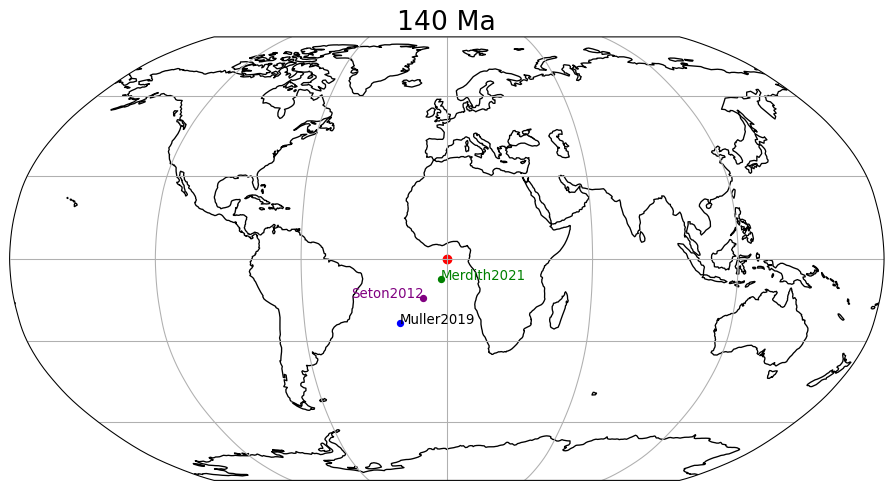

In [10]:
# now let's plot something for fun

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

crs = ccrs.Robinson(central_longitude=0.0, globe=None)
fig = plt.figure(figsize=(12, 6), dpi=96)
ax = plt.axes(projection=crs)
ax.gridlines()
ax.set_global()
ax.coastlines()

ax.scatter(
    [lon_0],
    [lat_0],
    color="red",
    transform=ccrs.PlateCarree(),
    s=40
)

ax.scatter(
    [muller2019_0_0[1]],
    [muller2019_0_0[0]],
    color="blue",
    transform=ccrs.PlateCarree(),
    s=20
)
ax.text(muller2019_0_0[1], muller2019_0_0[0], "Muller2019", transform=ccrs.PlateCarree(), fontsize=10)

ax.scatter(
    [merdith2021_0_0[1]],
    [merdith2021_0_0[0]],
    color="green",
    transform=ccrs.PlateCarree(),
    s=20
)
ax.text(merdith2021_0_0[1], merdith2021_0_0[0], "Merdith2021", transform=ccrs.PlateCarree(), fontsize=10, color="green")

ax.scatter(
    [seton2012_0_0[1]],
    [seton2012_0_0[0]],
    color="purple",
    transform=ccrs.PlateCarree(),
    s=20
)
ax.text(seton2012_0_0[1]-30, seton2012_0_0[0], "Seton2012", transform=ccrs.PlateCarree(), fontsize=10, color="purple")


plt.title(f"{time} Ma", fontsize=20)


plt.show()